<font color='blue'> **09b__________________________________ PyGSLIB_declus** </font> # myenv

In [1]:
import os; import sys ; from pathlib import Path  ;_R=Path("_R")  ;_R.mkdir(exist_ok=True); TA=Path("_R/09b_Declus_PyGSLIB_")  ;TA.mkdir(exist_ok=True) #; os.chdir(TA)
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt ;import pygslib as gslib ; import random ; cmap = plt.cm.inferno
sys.path.append('E:/15_REPOS/02_Beta-Me/data/Krig/BibliOS') ; from Beta_lib import GSLIB_sgsim_2d_uncond, affine, hist, pixelplt, random_sample, locpix, locmap, regular_sample
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) 
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) 
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) 

In [2]:
nx = 100; ny = 100; cell_size = 10     ; xmin = 0.0; ymin = 0.0     ; xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size        ; seed = 10     
range_max = 1800; range_min = 500         ; azimuth = 90            ; mean = 10.0                                                    ; stdev = 2.0       
sim,value = GSLIB_sgsim_2d_uncond(1,nx,ny,cell_size,seed ,range_max,range_min,azimuth  ,"simulation")        ; sim = affine(sim,mean,stdev)  

RAND = random_sample(sim,xmin,xmax,ymin,ymax,cell_size,100,"Porosity") ; RAND['Z'] = np.zeros(100) ; RAND_mean = RAND[['Porosity']].mean(axis=0)
REG_ = regular_sample(sim,xmin,xmax,ymin,ymax,cell_size,10,10,'Porosity') ; REG_mean = REG_[['Porosity']].mean(axis=0)   ; n = len(REG_) ; REG_['Z'] = np.zeros(n)

Exhastive Mean =  10.0 , Exhaustive Variance =  4.0


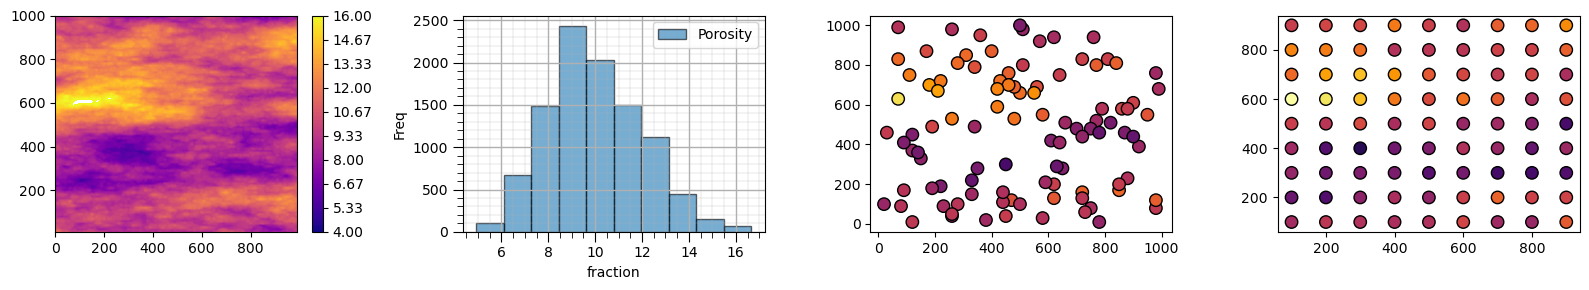

In [3]:
step = 10                                  ; xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
plt.figure(figsize=(16,3))                 ; vmin = int(sim.min()) ; vmax = int(sim.max()); LV=levels=np.linspace(vmin,vmax,100) 
plt.subplot(141) ;im=plt.contourf(xx,yy,sim, cmap='plasma',vmin=vmin,vmax=vmax,levels=LV) ;cbar = plt.colorbar(im,orientation = 'vertical',ticks=np.linspace(vmin,vmax,10))            
plt.subplot(142) ;plt.hist(sim.flatten() , alpha=0.6,edgecolor='black',label='Porosity') ;plt.xlabel('fraction'); plt.ylabel('Freq');plt.legend();add_grid()
ex_mean = np.average(sim) ; ex_var = np.var(sim) ; print('Exhastive Mean = ',round(ex_mean,2),', Exhaustive Variance = ',round(ex_var,2))

plt.subplot(143) ; im = plt.scatter(RAND['X'],RAND['Y'],s=80, c=RAND['Porosity'], marker=None, cmap=cmap, norm=None, vmin=vmin, vmax=vmax, edgecolors="black")
plt.subplot(144) ; im = plt.scatter(REG_['X'],REG_['Y'],s=80, c=REG_['Porosity'], marker=None, cmap=cmap, norm=None, vmin=vmin, vmax=vmax, edgecolors="black")   ; plt.tight_layout();plt.show()
#plt.subplot(144)  ; im = plt.scatter(sim2['X'],sim2['Y'],s=80, c=sim2['Porosity'], marker=None, cmap=cmap, norm=None, vmin=vmin, vmax=vmax, edgecolors="black") ; plt.tight_layout();plt.show()

In [4]:
'''nx = 100; ny = 100; cell_size = 10        ; xmin = 0.0; ymin = 0.0     ; xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size           ; seed = random.seed()     
range_max = 1800; range_min = 500         ; azimuth = 65               ; mean = 10.0                                                          ; stdev = 2.0       
sim,value = GSLIB_sgsim_2d_uncond(1,nx,ny,cell_size,seed ,range_max,range_min,azimuth  ,"simulation")        ; sim = affine(sim,mean,stdev)   ; step=10  ; print('sim.shape:',sim.shape)

mx=10     ; my=10
x = []; y = []; v = []; iix = 0; iiy = 0;
xx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))
iiy = 0
for iy in range(0,ny):
    if iiy >= my: 
        iix = 0
        for ix in range(0,nx):
            if iix >= mx:       x.append(xx[ix,iy]);y.append(yy[ix,iy]); v.append(sim[ix,iy])    ; iix = 0; iiy = 0
            iix = iix + 1
    iiy = iiy + 1
sim2 = pd.DataFrame(np.c_[x,y,v],columns=['X', 'Y', 'Porosity'])
#print('sim:',int(sim.max()), int(sim.min()), int(sim.mean()),'___sim2:',int(sim2['Porosity'].max()), int(sim2['Porosity'].min()), int(sim2['Porosity'].mean()),'___','sim:',sim.shape,'___','sim2:',sim2.shape)
'''

'nx = 100; ny = 100; cell_size = 10        ; xmin = 0.0; ymin = 0.0     ; xmax = xmin + nx * cell_size; ymax = ymin + ny * cell_size           ; seed = random.seed()     \nrange_max = 1800; range_min = 500         ; azimuth = 65               ; mean = 10.0                                                          ; stdev = 2.0       \nsim,value = GSLIB_sgsim_2d_uncond(1,nx,ny,cell_size,seed ,range_max,range_min,azimuth  ,"simulation")        ; sim = affine(sim,mean,stdev)   ; step=10  ; print(\'sim.shape:\',sim.shape)\n\nmx=10     ; my=10\nx = []; y = []; v = []; iix = 0; iiy = 0;\nxx, yy = np.meshgrid(np.arange(xmin, xmax, step),np.arange(ymax, ymin, -1*step))\niiy = 0\nfor iy in range(0,ny):\n    if iiy >= my: \n        iix = 0\n        for ix in range(0,nx):\n            if iix >= mx:       x.append(xx[ix,iy]);y.append(yy[ix,iy]); v.append(sim[ix,iy])    ; iix = 0; iiy = 0\n            iix = iix + 1\n    iiy = iiy + 1\nsim2 = pd.DataFrame(np.c_[x,y,v],columns=[\'X\', \'Y\', \'Porosit

In [5]:
'''reg_parameters = {'x':RAND.X  ,'y':RAND.Y  ,'z':RAND.Z,   'vr':RAND.Porosity   ,'anisy':1.,'anisz':1. ,'minmax':0,   # 0=look for minimum declustered mean (1=max), 'i'
                  'ncell':100 ,'cmin':5    ,'cmax':5000,        # maximum cell sizes, 'i'. Will be update to cmin if ncell == 1
                  'noff'   :  8,                                # number of origin offsets, 'i'. This is to avoid local minima/maxima
                  'maxcel' :  100000}                           # maximum number of cells , 'i'. This is to avoid large calculations, if MAXCEL<1 this check will be 
declus_reg = gslib.gslib.declus(reg_parameters)                                                         ; declus_mean_reg = declus_reg[11]    ; cell_size_reg = declus_reg[8]      
print('The true mean is:' + str(round(ex_mean,2)) + ', ____sample mean is:' + str(round(RAND_mean.iloc[0],2)) + ',___and declustered mean is:' + str(round(declus_reg[1],2)))
plt.figure(figsize=(7,3)) 
plt.subplot(121) ; im = plt.scatter(RAND['X'],RAND['Y'],s=None, c=declus_reg[0], cmap=cmap, vmin=0.8, vmax=1.1, edgecolors="black")
plt.subplot(122) ; plt.scatter(cell_size_reg,declus_mean_reg)                                       ; plt.tight_layout();plt.show()'''

'reg_parameters = {\'x\':RAND.X  ,\'y\':RAND.Y  ,\'z\':RAND.Z,   \'vr\':RAND.Porosity   ,\'anisy\':1.,\'anisz\':1. ,\'minmax\':0,   # 0=look for minimum declustered mean (1=max), \'i\'\n                  \'ncell\':100 ,\'cmin\':5    ,\'cmax\':5000,        # maximum cell sizes, \'i\'. Will be update to cmin if ncell == 1\n                  \'noff\'   :  8,                                # number of origin offsets, \'i\'. This is to avoid local minima/maxima\n                  \'maxcel\' :  100000}                           # maximum number of cells , \'i\'. This is to avoid large calculations, if MAXCEL<1 this check will be \ndeclus_reg = gslib.gslib.declus(reg_parameters)                                                         ; declus_mean_reg = declus_reg[11]    ; cell_size_reg = declus_reg[8]      \nprint(\'The true mean is:\' + str(round(ex_mean,2)) + \', ____sample mean is:\' + str(round(RAND_mean.iloc[0],2)) + \',___and declustered mean is:\' + str(round(declus_reg[1],2)))\nplt.f

In [6]:
'''reg_parameters = {'x':REG_.X  ,'y':REG_.Y  ,'z':REG_.Z,   'vr':REG_.Porosity   ,'anisy':1.,'anisz':1. ,'minmax':0,   # 0=look for minimum declustered mean (1=max), 'i'
                  'ncell':100 ,'cmin':5    ,'cmax':5000,        # maximum cell sizes, 'i'. Will be update to cmin if ncell == 1
                  'noff'   :  8,                                # number of origin offsets, 'i'. This is to avoid local minima/maxima
                  'maxcel' :  100000}                           # maximum number of cells , 'i'. This is to avoid large calculations, if MAXCEL<1 this check will be 
declus_reg = gslib.gslib.declus(reg_parameters)                                                        ; declus_mean_reg = declus_reg[11]    ; cell_size_reg = declus_reg[8]      
print('The true mean is:' + str(round(ex_mean,2)) + ', ____sample mean is:' + str(round(REG_mean.iloc[0],2)) + ',___and declustered mean is:' + str(round(declus_reg[1],2)))
plt.figure(figsize=(7,3)) 
plt.subplot(121) ; im = plt.scatter(REG_['X'],REG_['Y'],s=None, c=declus_reg[0], cmap=cmap, vmin=0.8, vmax=1.1, edgecolors="black")
plt.subplot(122) ; plt.scatter(cell_size_reg,declus_mean_reg)                                       ; plt.tight_layout();plt.show()'''

'reg_parameters = {\'x\':REG_.X  ,\'y\':REG_.Y  ,\'z\':REG_.Z,   \'vr\':REG_.Porosity   ,\'anisy\':1.,\'anisz\':1. ,\'minmax\':0,   # 0=look for minimum declustered mean (1=max), \'i\'\n                  \'ncell\':100 ,\'cmin\':5    ,\'cmax\':5000,        # maximum cell sizes, \'i\'. Will be update to cmin if ncell == 1\n                  \'noff\'   :  8,                                # number of origin offsets, \'i\'. This is to avoid local minima/maxima\n                  \'maxcel\' :  100000}                           # maximum number of cells , \'i\'. This is to avoid large calculations, if MAXCEL<1 this check will be \ndeclus_reg = gslib.gslib.declus(reg_parameters)                                                        ; declus_mean_reg = declus_reg[11]    ; cell_size_reg = declus_reg[8]      \nprint(\'The true mean is:\' + str(round(ex_mean,2)) + \', ____sample mean is:\' + str(round(REG_mean.iloc[0],2)) + \',___and declustered mean is:\' + str(round(declus_reg[1],2)))\nplt.fig